# PREDICTION USING SUPERVISED ML

A simple dataset with just 2 variables is given (Number of study hours and percentage of marks).  The task is to predict the percentage of marks based on the number of study hours.

We'll first load the data and see which type of ML algorithm must be implemented.

### Import Libraries

We are going to use tensorflow to build the model

In [1]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt  
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


### Loading Dataset

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Now let us plot and see if we could interpret something from the graph which could help us build the ML model.

### Plotting the dataset

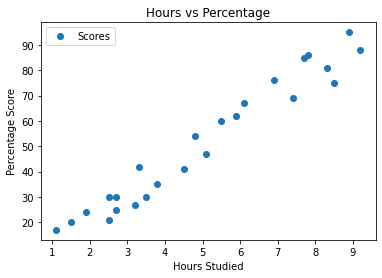

In [3]:
data.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

It is observed that the dataset follows a linear trend and hence we could build our model using linear regression.

###  Preparing the Dataset

We'll divide the dataset into 2. One for training and the other for testing.

In [4]:
x_train = data["Hours"].sample(frac=0.8, random_state=0)
y_train = data["Scores"].sample(frac=0.8, random_state=0)

x_test = data["Hours"].drop(x_train.index)
y_test = data["Scores"].drop(y_train.index)

Declare two trainable Tensorflow Variables for the Weights and Bias and initializing them randomly using np.random.randn(). X and Y are place holders, the training examples are fed into the optimizer using these.

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [6]:
learning_rate = 0.001
training_epochs = 100

Next we ned to define the hypothesis (relation between x and y). Here, in linear regression, it is y = wx + b

In [7]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)

n = len(x_train)

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
  
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
  
# Global Variables Initializer
init = tf.global_variables_initializer()

In [8]:
# Starting the Tensorflow Session
with tf.Session() as sess:
      
    # Initializing the Variables
    sess.run(init)
      
    # Iterating through all the epochs
    for epoch in range(training_epochs):
          
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
      
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x_train, Y: y_train})
    weight = sess.run(W)
    bias = sess.run(b)

In [9]:
 #Calculating the predictions
predictions = weight * x_train + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 17.799417 Weight = 9.58588 bias = 0.66833454 



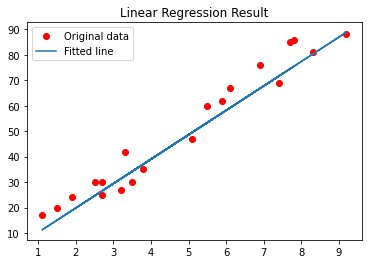

In [10]:
plt.plot(x_train, y_train, 'ro', label ='Original data')

plt.plot(x_train, predictions, label ='Fitted line')

plt.title('Linear Regression Result')
plt.legend()
plt.show()

The blue line in the above plot is the line that fits the dataset and predictions will be made in future based on this.

###  Predict for Test Dataset

In [11]:
predicted_y = weight * x_test + bias

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':predicted_y})
print(df)

    Actual  Predicted
0       21  24.633035
3       75  82.148317
12      41  43.804796
15      95  85.982669
21      54  46.680560


###  Calculting the error.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_y))

Mean Absolute Error: 5.984583809375762


### Calculating for random value

Now let us find out the predicted score using the model if a student studies for 9.25 hrs.

In [14]:
hours = 9.25
predicted_y = weight * hours + bias
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted_y))

No of Hours = 9.25
Predicted Score = 89.33772712945938


## Conclusion

The created model predicts the outcome with reasonable accuracy and error margin is around 6. Since the dataset is a small one, this error margin is to be expected. 

The predicted score of a student who studies for 9.25 hrs, accoridng to the model, is 89.33.